# Housing Prices Advanced Regression ML Competition

In [124]:
#load train data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('train_house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.shape

(1460, 81)

In [4]:
#inspect null columns with more than 20% missing
cols = []
for c in df.columns:
    if df[c].isna().sum() > 300:
        cols.append(c)
cols

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

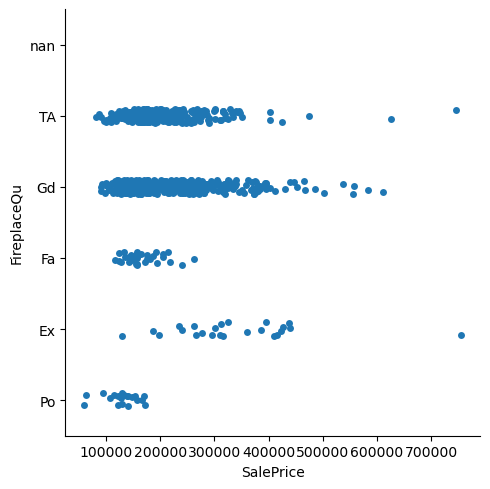

In [5]:
sns.catplot(df, x='SalePrice', y= 'FireplaceQu');

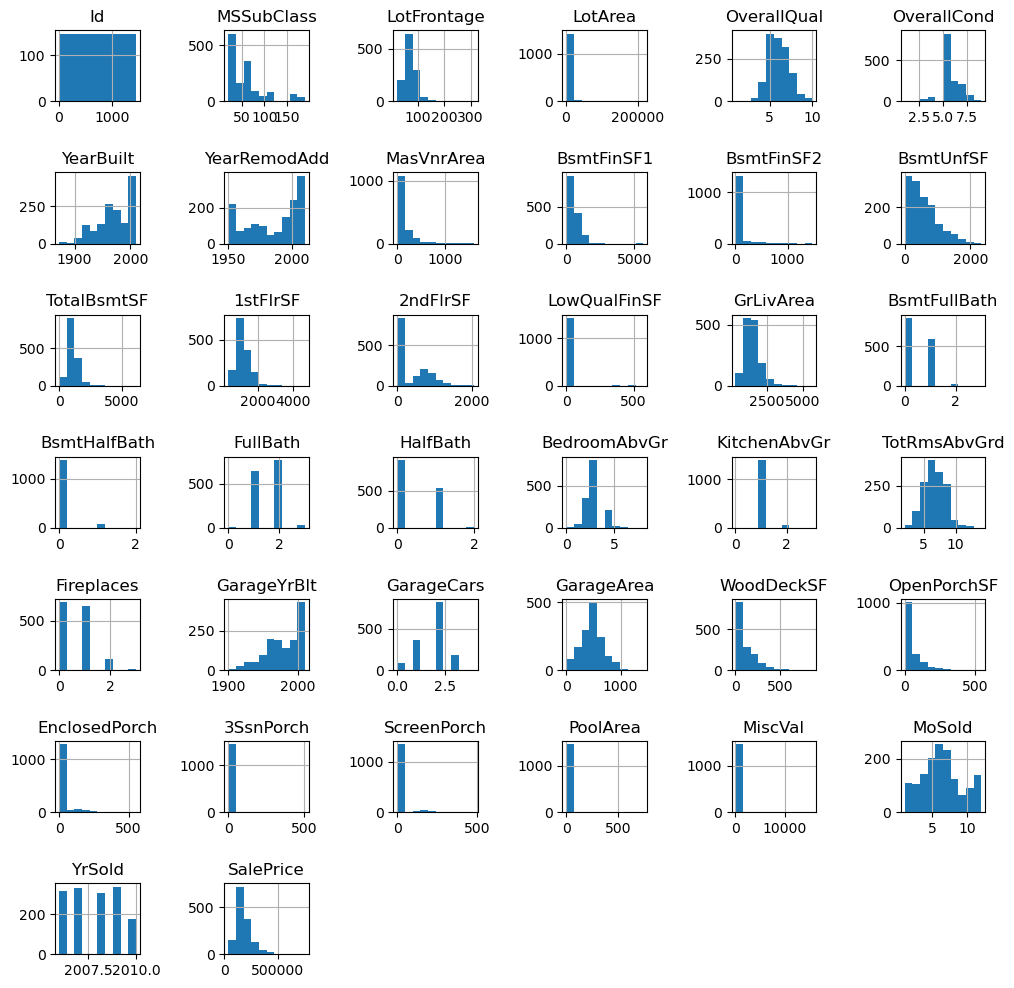

In [6]:
df.hist(figsize=(12,12))
plt.subplots_adjust(wspace=1, hspace=1 );

In [7]:
num_df = df.select_dtypes(include=[int,float])
num_df.corr().SalePrice

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [32]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Feature Engineer Process  
1. remove columns with more than 20% null values.
2. Fill nulls with median or most frequent
3. On numerical columns apply log transform to fix skewness
4. For categorical columns use label encoder or one hot encoder for appropriate columns
5. Standardize data

We use label encoder for ordinal data and one hot encoder for non ordinal. The ordinal data categories are 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageCond'.    
These are ordinal as the categories have a hierachal nature and we use a label encoder for these.

In [ ]:
'MSSubClass',
'BsmtFinSF2',      
'LowQualFinSF',    
'BsmtHalfBath',    
'3SsnPorch',        
'PoolArea',         
'MiscVal',         
'MoSold',           
'YrSold'          


### Create Pipeline

In [169]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector

X = df.drop(['SalePrice'],axis=1)
y= np.log1p(df.SalePrice)

#clean df first
def clean(X):
    drop = ['Alley', 'MasVnrType', 'PoolQC', 'Fence','FireplaceQu', 'MiscFeature', 'Id','MSSubClass',
            'BsmtFinSF2',      'LowQualFinSF',    'BsmtHalfBath',    '3SsnPorch',        'PoolArea',         'MiscVal',         'MoSold',           'YrSold']  

    X = X.drop(drop, axis=1)    
    return X


#create label encoder function
def label(X):
    list = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
                               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                               'KitchenQual', 'GarageCond']
    si = SimpleImputer(strategy = 'most_frequent')
    le = LabelEncoder()
    for l in list:
        # Impute missing values
        imputed = si.fit_transform(X[[l]])
        # Convert back to 1D array
        imputed = imputed.ravel()
        # Apply label encoding
        X[l] = le.fit_transform(imputed)
    return X


#create log transform function
log_transform = make_pipeline(
    SimpleImputer(strategy='mean'),
    FunctionTransformer(np.log1p, feature_names_out = 'one-to-one', validate=False),
    StandardScaler()
)

#create one hot encoder pipeline
onehot_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse= False,handle_unknown='ignore')
)

#default
default_pipeline = make_pipeline(
    StandardScaler()
)

#Combine into one pipeline
preprocess = ColumnTransformer([
    ('log',log_transform, make_column_selector(dtype_include = (int,float))),
    ('one', onehot_pipeline, make_column_selector(dtype_include=object))
], remainder = default_pipeline)

pipeline = Pipeline([
    ('clean',FunctionTransformer(clean, validate=False)),
    ('label',FunctionTransformer(label, validate=False)),
    ('preprocess',preprocess)
])

In [170]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
X = pipeline.fit_transform(X)


In [171]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=42)

In [172]:
X.shape

(1460, 215)

In [173]:
Xtrain.shape

(1022, 215)

In [174]:
Xtest.shape

(438, 215)

In [175]:
preprocess.get_feature_names_out()

array(['log__LotFrontage', 'log__LotArea', 'log__LotShape',
       'log__LandSlope', 'log__OverallQual', 'log__OverallCond',
       'log__YearBuilt', 'log__YearRemodAdd', 'log__MasVnrArea',
       'log__ExterQual', 'log__ExterCond', 'log__BsmtQual',
       'log__BsmtCond', 'log__BsmtExposure', 'log__BsmtFinType1',
       'log__BsmtFinSF1', 'log__BsmtFinType2', 'log__BsmtUnfSF',
       'log__TotalBsmtSF', 'log__HeatingQC', 'log__1stFlrSF',
       'log__2ndFlrSF', 'log__GrLivArea', 'log__BsmtFullBath',
       'log__FullBath', 'log__HalfBath', 'log__BedroomAbvGr',
       'log__KitchenAbvGr', 'log__KitchenQual', 'log__TotRmsAbvGrd',
       'log__Fireplaces', 'log__GarageYrBlt', 'log__GarageCars',
       'log__GarageArea', 'log__GarageCond', 'log__WoodDeckSF',
       'log__OpenPorchSF', 'log__EnclosedPorch', 'log__ScreenPorch',
       'one__MSZoning_C (all)', 'one__MSZoning_FV', 'one__MSZoning_RH',
       'one__MSZoning_RL', 'one__MSZoning_RM', 'one__Street_Grvl',
       'one__Street_Pave',

### Build Models

In [176]:
#metrics
from sklearn.metrics import r2_score, mean_squared_error

In [177]:
#Model 1 use linear
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain,ytrain)
pred = lr.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)

532040815.5692036
-1.6685973371326973e+18


In [178]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(Xtrain,ytrain)
pred = rf.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)

0.1371157396617054
0.889175375959562


In [179]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(Xtrain, ytrain)
pred = gbr.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)

0.12977570584439635
0.9007230458355777


In [180]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgbr = HistGradientBoostingRegressor(random_state=42)
hgbr.fit(Xtrain, ytrain)
pred = hgbr.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)

0.13281725758235155
0.8960150080704796


In [181]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(Xtrain,ytrain)
pred = svm.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)

0.1423318093783824
0.8805831569679363


In [182]:
from sklearn.ensemble import VotingRegressor
est = ([
    ('rf',rf),
    ('gbr',gbr),
    ('hgbr',hgbr)
])

vr = VotingRegressor(est)
vr.fit(Xtrain,ytrain)
pred = vr.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)

0.12834177529268734
0.9029048068720048


In [183]:
from sklearn.ensemble import StackingRegressor
est = ([
    ('rf',rf),
    ('gbr',gbr),
    ('hgbr',hgbr)
])

sc = StackingRegressor(est, n_jobs = -1)
sc.fit(Xtrain,ytrain)
pred = sc.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)

0.12711387599408358
0.9047538196445236


In [ ]:
'''import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your base models
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
hgbr = HistGradientBoostingRegressor()


# Define the stacking regressor
est = [
    ('rf', rf),
    ('gbr', gbr),
    ('hgbr', hgbr)
]
sc = StackingRegressor(estimators=est)

# Define hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [3, 5, 7],
    'gbr__n_estimators': [50, 100, 200],
    'gbr__learning_rate': [0.01, 0.1, 0.5],
    'hgbr__max_iter': [50, 100, 200],
    'hgbr__learning_rate': [0.01, 0.1, 0.5]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=sc,
    param_distributions=param_distributions,
    n_iter=10,  
    cv=5,       
    scoring='neg_mean_squared_error', 
    random_state=42
)


random_search.fit(Xtrain, ytrain)
print("Best Parameters:", random_search.best_params_)

y_pred = random_search.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

print("RMSE:", rmse)
print("R^2 Score:", r2)
''

In [189]:
#cross validate and tune hyperparameters
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(
    loss = ['squared_error', 'absolute_error','huber','quantile'],
    learning_rate = [0.1,0.5,1],
    n_estimators = [50,100,200],
    max_features = ['sqrt','log2',None]
)

clf2 = RandomizedSearchCV(gbr, distributions, cv=7, random_state=42,
                         scoring = 'neg_mean_squared_log_error', n_jobs=-1)

clf2.fit(Xtrain, ytrain)

pred = clf2.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)                         



0.13047123463770627
0.8996560508186612


In [190]:
#cross validate and tune hyperparameters hgbr
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(
    loss = ['squared_error', 'absolute_error','gamma','quantile','poisson'],
    learning_rate = [0.1,0.5,1],
    max_iter = [50,100,200]
)

clf = RandomizedSearchCV(hgbr, distributions, cv=5, random_state=42,
                         scoring = 'neg_mean_squared_log_error', n_jobs=-1)

clf.fit(Xtrain, ytrain)

pred = clf.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)                         



0.13583508487520132
0.8912359021201693


In [191]:
est = ([
    
    ('gbr',clf2),
    ('hgbr',clf)
])

scf = StackingRegressor(est, n_jobs = -1)
scf.fit(Xtrain,ytrain)
pred = scf.predict(Xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest,pred)

print(rmse)
print(r2)

0.12615762150387966
0.9061814686619487


In [192]:
test = pd.read_csv('test_house.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [193]:
sample = pipeline.transform(test)
sample.shape

(1459, 215)

In [194]:
pred_s = scf.predict(sample)
pred_s

array([11.74022712, 11.98732372, 12.15843549, ..., 12.05374256,
       11.6856137 , 12.33054862])

In [195]:
test['SalePrice']=np.exp(pred_s)-1
submission = test[['SalePrice']]
submission.index = test['Id']
submission

,SalePrice
Id,
1461,125519.845039
1462,160703.688087
1463,190694.937766
1464,190357.252250
1465,194012.556310
...,...
2915,77052.422755
2916,80712.053846
2917,171739.957427


In [196]:
submission.to_csv('house_sub.csv')